In [1]:
#importing the necessary libraries for data analysis and machine learning, such as numpy, pandas, seaborn, matplotlib and sklearn. It also includes code that imports data from a file and splits it into train and test sets. Additionally, it includes code that creates a linear regression model, and code that evaluates the model by calculating metrics such as mean absolute error and mean squared error.
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# reads a CSV file called "insurance.csv" and stores the data in a Pandas DataFrame called "DS". The CSV file contains data about insurance policies, such as the policy holder's name, age, gender, and coverage type.
ds= pd.read_csv ('insurance.csv')

In [5]:
#This code displays the first 10 rows of the dataset. It is a useful way to quickly get an overview of the data and its structure.
ds.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
# generation a summary of the statistics of a given dataset. 
#This summary includes the count, mean, standard deviation, min, 25th percentile, 50th percentile (median), 75th percentile, and max of each column in the dataset.
#This code can be used to get a quick overview of the data in the ds and to spot any outliers or anomalies.
ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#This code provides an overview of the data stored in a particular dataset.
#It displays information about the ds including the number of columns, the data types for each column, the number of non-null values for each column, and the memory usage. 
#This information can be used to identify potential issues with the dataset, such as missing values or columns with incorrect data types.
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#displays the last 5 rows of a dataset. It is useful for quickly viewing the values of the last few rows of a ds.
#The tail() method returns the last 5 rows if a number is not specified
ds.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [9]:
#This code is providing information about the shape of a ds, which is typically represented as a tuple of numbers.
#The first number indicates the number of rows in the ds and the second number indicates the number of columns.
#A DataFrame's shape is a tuple of array dimensions that indicates how many rows and columns it contains.
ds.shape

(1338, 7)

In [10]:
#This code is used to determine the number of missing values in a given dataset.
#The output is a count of the number of missing values in each column.
ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#return the number of unique values in each column of the given dataset.
ds.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
#calculating the correlation between different columns in a dataset.
#The correlation coefficient is a numerical measure of the strength of the linear relationship between two variables.
#The result of this code will show a matrix of correlation coefficients which indicate how strongly each variable is related to another.
ds.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [13]:
#importing matplotlib, a Python library for creating data visualizations.
#It allows users to create a variety of graphs, charts, and other visualizations for data analysis and presentation.
import matplotlib.pyplot as plt

(array([ 13.,  17.,  47.,  80., 103., 131., 162., 157., 145., 143., 105.,
         90.,  54.,  42.,  20.,  12.,  10.,   4.,   1.,   2.]),
 array([15.96  , 17.8185, 19.677 , 21.5355, 23.394 , 25.2525, 27.111 ,
        28.9695, 30.828 , 32.6865, 34.545 , 36.4035, 38.262 , 40.1205,
        41.979 , 43.8375, 45.696 , 47.5545, 49.413 , 51.2715, 53.13  ]),
 <BarContainer object of 20 artists>)

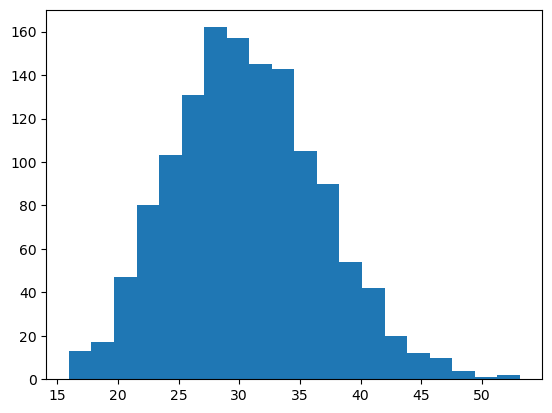

In [14]:
#This code will generate a histogram of the data in the given column_name.
#The histogram will have 20 bins.
plt.hist(ds['bmi'], bins=20)

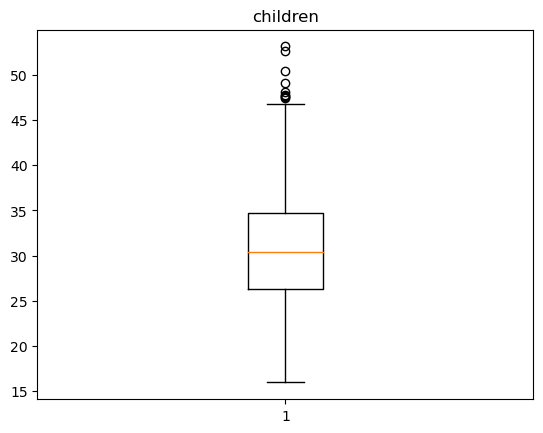

In [15]:
# Create a boxplot
plt.boxplot(ds['bmi'])
plt.title('children')
plt.show()

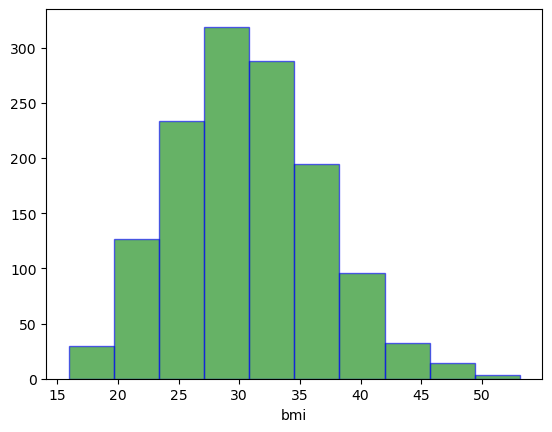

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

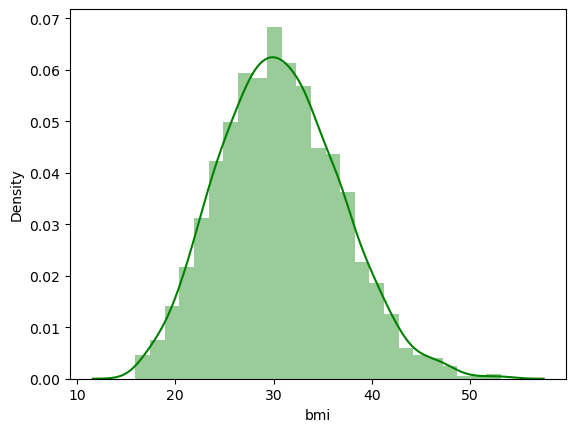

In [16]:
#This code plots a histogram of the BMI (Body Mass Index) values in the dataset.
#The histogram is plotted with black bars, gray edges, and an alpha of 0.6. Additionally, a seaborn distplot is also plotted for the same data in black.
plt.hist(ds['bmi'], color= 'green', edgecolor = 'blue', alpha = 0.6)
plt.xlabel('bmi')
plt.show()

sns.distplot(ds['bmi'], color= 'green')

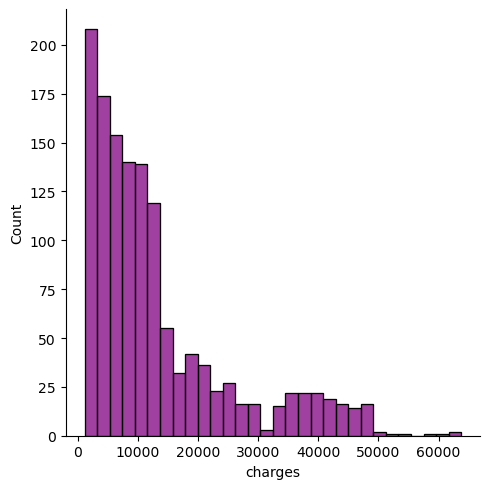

In [17]:
#This code creates a seaborn displot (distribution plot) of the 'charges' column from the given ds. 
#The plot is displayed in purple. This plot provides a visual representation of the distribution of values within the ds.
sns.displot(ds['charges'], color="purple");

In [18]:
#calculating the skewness and kurtosis of the 'charges' column in the 'data' dataset.
#Skewness measures the asymmetry of a distribution and kurtosis measures the tail-heaviness of a distribution.
print("skewness: %f" %ds['charges'].skew())
print("kurtosis: %f" %ds['charges'].kurt())

skewness: 1.515880
kurtosis: 1.606299


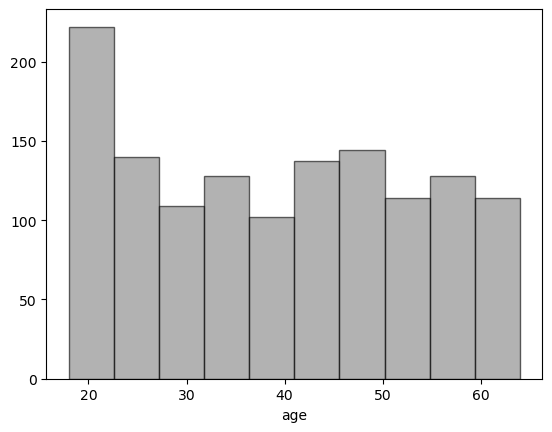

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

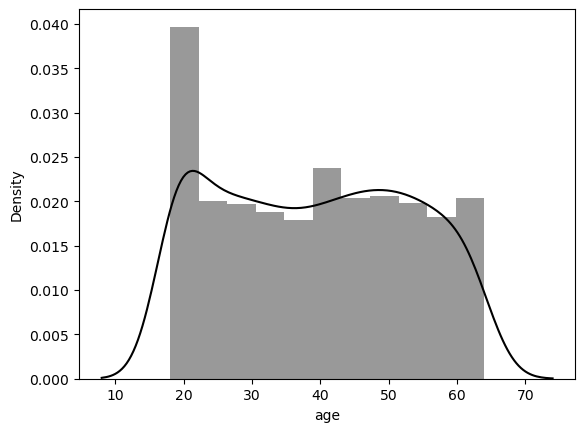

In [19]:
# histogram of the age distribution in the dataset. 
#The code uses matplotlib's plt.hist() function to plot the histogram.
#The color parameter is set to green and the edgecolor is set to black.
#The alpha parameter is set to 0.6 to make the bars more transparent.
#The xlabel is set to "age" to label the x-axis. Finally, the code also uses the seaborn library's distplot() function to plot the same age distribution.
plt.hist(ds['age'], color= 'gray', edgecolor = 'black', alpha = 0.6)
plt.xlabel('age')
plt.show()
sns.distplot(ds['age'], color= 'black')

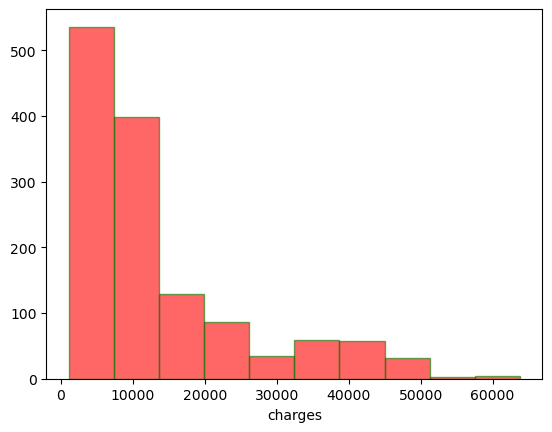

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

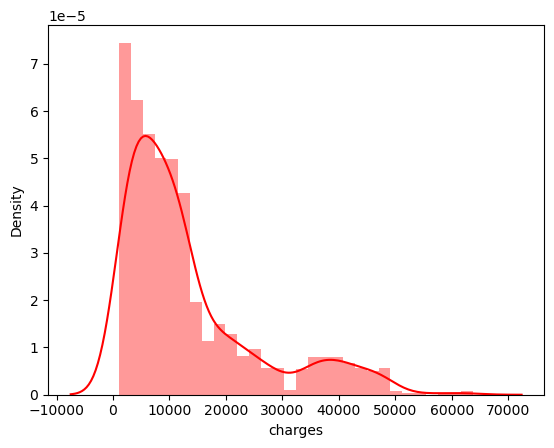

In [20]:
 #createing a histogram and a distribution plot of the charges column from a given dataset.
#The histogram is plotted with a color of red, an edgecolor of green, and an alpha of 0.6. 
#The distribution plot is also plotted with a color of red. This code helps to visualize the frequency of values in the charges column.
plt.hist(ds['charges'], color= 'red', edgecolor = 'green', alpha = 0.6)
plt.xlabel('charges')
plt.show()

sns.distplot(ds['charges'], color= 'red')

NameError: name 'mp' is not defined

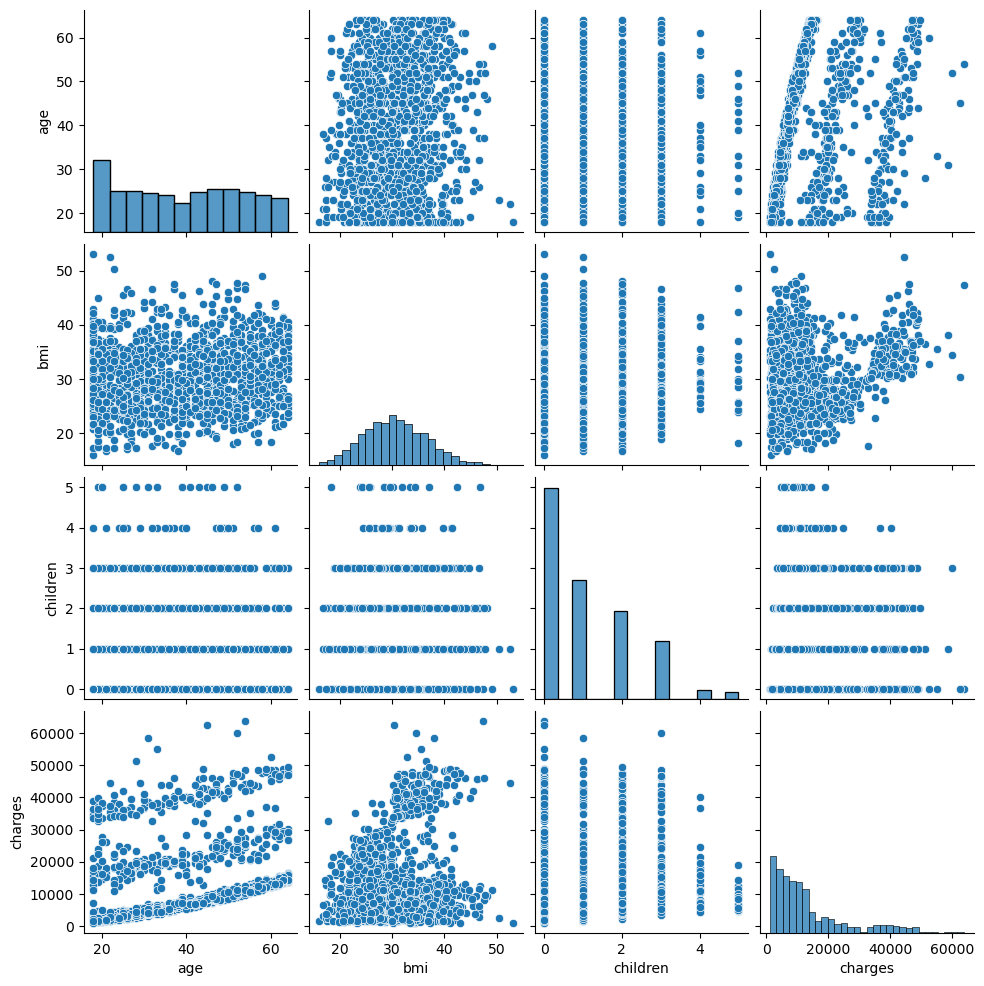

In [21]:
#plots a pairwise relationship between different variables in a dataset.
#It is a type of plot that looks at all possible pairs of variables and shows the relationship between them using scatter plots.
#This can be useful in understanding how different variables are related to each other and can help in determining correlations between variables.
sns.pairplot(ds)
mp.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

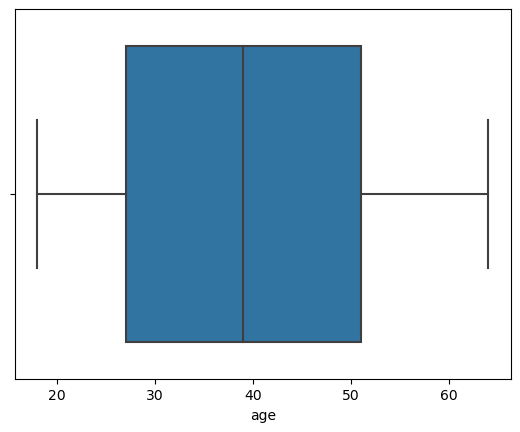

In [22]:
 #creating a boxplot that displays the distribution of the age variable from the dataset.
#The boxplot provides a visual representation of the range, median, quartiles, and outliers of the age variable.
sns.boxplot(ds['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

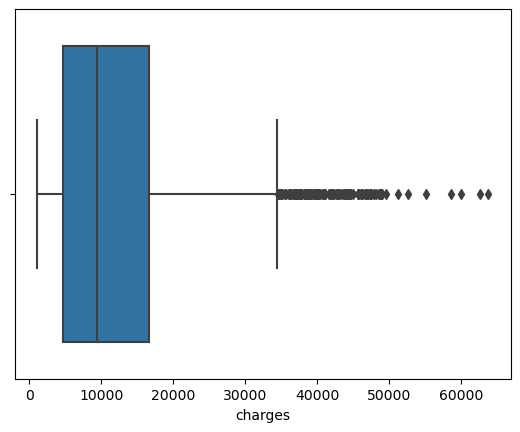

In [23]:
#creating a boxplot of the 'charges' column from the dataset'
#A boxplot visualizes the distribution of a given dataset by showing the median, quartiles, and any outliers.
#It can be used to compare different groups or variables.
sns.boxplot(ds['charges'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

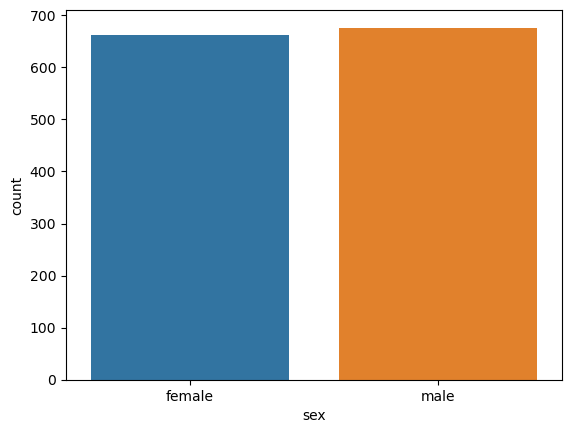

In [24]:
#ploting a countplot of the variable 'sex' from the given dataset. 
#It provides a visual representation of the number of males and females in the dataset.
sns.countplot(ds['sex'])

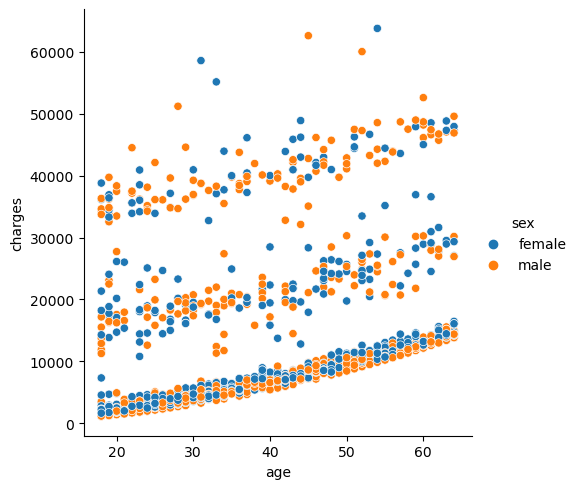

In [27]:
#creating a scatter plot with the variables 'age' and 'charges' as the x and y axes, respectively, and 'sex' as the hue.
#The data used for the plot is taken from the dataset provided. This plot can be used to visualize the relationship between age, charges, and sex in the given dataset.
sns.relplot(x='age', y='charges', hue='sex',data=ds)
plt.show()

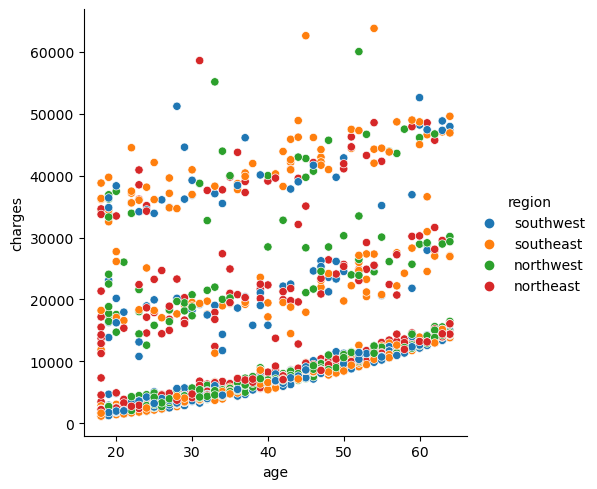

In [28]:
#producing a scatterplot showing the relationship between the age and charges of individuals in different regions.
#The hue parameter allows the user to visualize the data according to the region, with each region being assigned a different color.
#This visualization can be used to identify any trends or patterns in the data that may be related to the region.
sns.relplot(x='age', y='charges', hue='region',data=ds)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

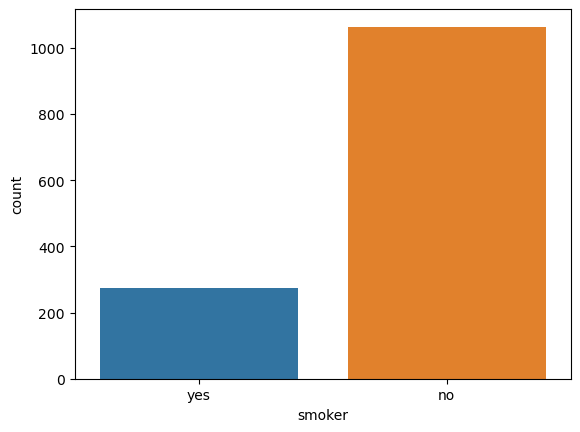

In [29]:
#creates a countplot using the "smoker" column from the dataset.
#The countplot displays the number of observations in each category of the "smoker" column.
#It can be used to visualize the distribution of smoker status in the dataset.
sns.countplot(ds['smoker'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points

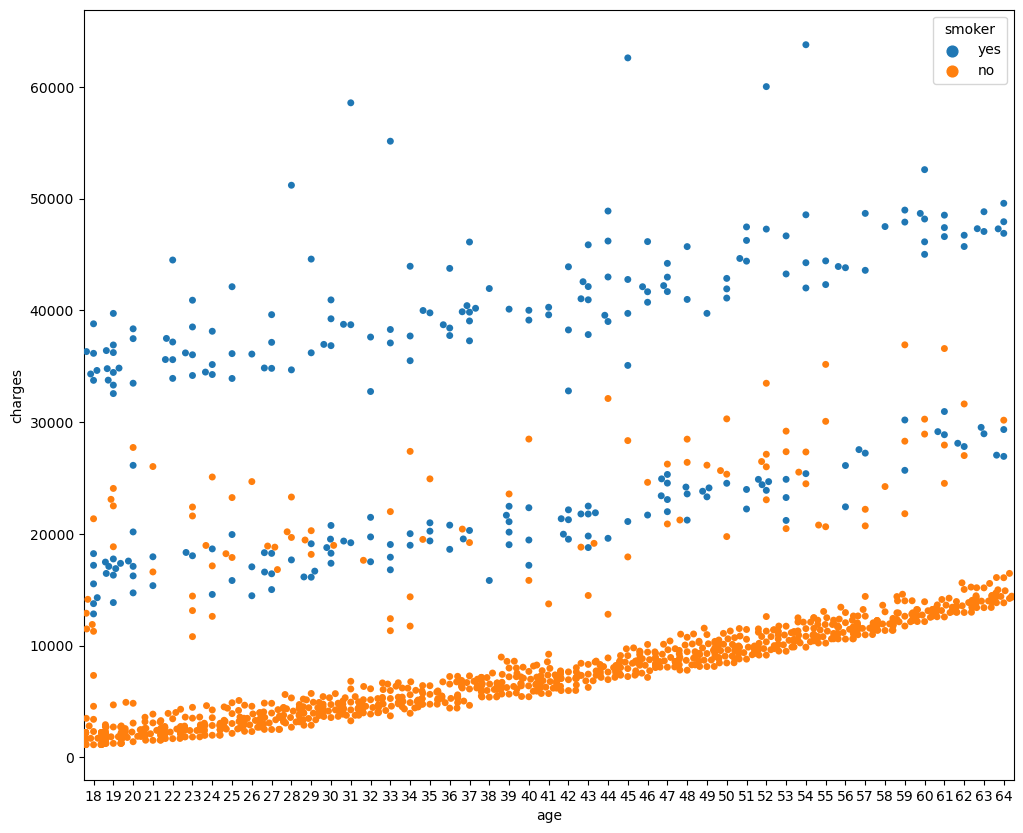

In [30]:
#generates a swarmplot that shows the relationship between age, charges, and smoking status.
#The y-axis shows charges, the x-axis shows age, and the hue indicates smoking status (smoker or non-smoker).
#This plot provides a visual representation of the data and can be used to compare the charges and age of smokers and non-smokers.
plt.figure(figsize=(12,10))
sns.swarmplot(y='charges',x='age',hue='smoker',data=ds)
plt.show()

In [31]:
#displays the number of values for each category in a given "sex" dataset.
#It will show the frequency or count of each value in the dataset.
ds.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [32]:
#Filter data

ds[ds['bmi']==1].head()

,age,sex,bmi,children,smoker,region,charges


In [33]:
#Correlation 

ds.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

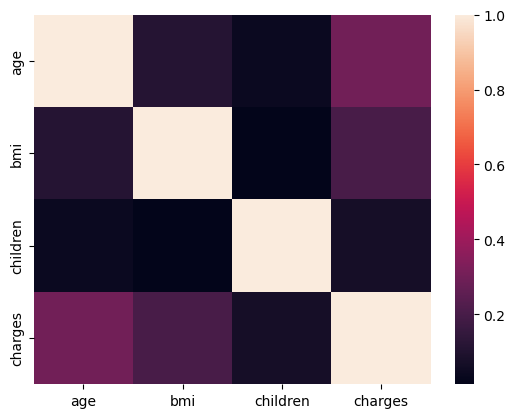

In [34]:
# correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated.
sns.heatmap(ds.corr())